# Capstone

---
### Problem Statement:

**Which players are predicted to be future talents after 2017?**

---

### Goal:

- Clustering using rankings and results to group players into performance groups
- Use stats of players to group them into clusters to predict performance


### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
### Read in data

In [2]:
df_scores = pd.read_csv('./datasets/match_scores_2017_unindexed_csv.csv')
df_stats = pd.read_csv('./datasets/match_stats_2017_unindexed_csv.csv')
df_rankings = pd.read_csv('./datasets/rankings_2017.csv')

In [3]:
print(df_scores.columns)
df_scores.head(2)

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')


,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Finals,1,1,Grigor Dimitrov,d875,grigor-dimitrov,...,3,62 26 63,2,1,14,11,0,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats
1,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,1,Grigor Dimitrov,d875,grigor-dimitrov,...,1,76(7) 62,2,0,13,8,1,0,2017-339-d875-r975,/en/scores/2017/339/MS002/match-stats


In [4]:
print(df_stats.columns)
df_stats.head(2)

Index(['tourney_order', 'match_id', 'match_stats_url_suffix', 'match_time',
       'match_duration', 'winner_aces', 'winner_double_faults',
       'winner_first_serves_in', 'winner_first_serves_total',
       'winner_first_serve_points_won', 'winner_first_serve_points_total',
       'winner_second_serve_points_won', 'winner_second_serve_points_total',
       'winner_break_points_saved', 'winner_break_points_serve_total',
       'winner_service_points_won', 'winner_service_points_total',
       'winner_first_serve_return_won', 'winner_first_serve_return_total',
       'winner_second_serve_return_won', 'winner_second_serve_return_total',
       'winner_break_points_converted', 'winner_break_points_return_total',
       'winner_service_games_played', 'winner_return_games_played',
       'winner_return_points_won', 'winner_return_points_total',
       'winner_total_points_won', 'winner_total_points_total', 'loser_aces',
       'loser_double_faults', 'loser_first_serves_in',
       'loser_f

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,2017-339-r975-n409,/en/scores/2017/339/MS004/match-stats,02:21:00,141,23,3,62,97,50,...,19,35,1,7,14,15,31,97,84,181
1,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats,01:49:00,109,7,2,52,77,41,...,13,25,2,7,12,13,24,77,69,146


In [5]:
# look for columns with null values and drop

df_scores.drop(columns = 'match_stats_url_suffix', inplace = True) # can I filter by columsn that have missing values?

---
### EDA

In [6]:
# Look at 1st serve and 2nd serve percentages
df_stats.dtypes

tourney_order                        int64
match_id                            object
match_stats_url_suffix              object
match_time                          object
match_duration                       int64
winner_aces                          int64
winner_double_faults                 int64
winner_first_serves_in               int64
winner_first_serves_total            int64
winner_first_serve_points_won        int64
winner_first_serve_points_total      int64
winner_second_serve_points_won       int64
winner_second_serve_points_total     int64
winner_break_points_saved            int64
winner_break_points_serve_total      int64
winner_service_points_won            int64
winner_service_points_total          int64
winner_first_serve_return_won        int64
winner_first_serve_return_total      int64
winner_second_serve_return_won       int64
winner_second_serve_return_total     int64
winner_break_points_converted        int64
winner_break_points_return_total     int64
winner_serv

---
#### Winner vs Loser stats

In [7]:
# first serve percentage
avg_first_serve_in_win = (df_stats['winner_first_serves_in'] / df_stats['winner_first_serves_total']).mean()
avg_first_serve_in_lose = (df_stats['loser_first_serves_in'] / df_stats['loser_first_serves_total']).mean()

# first serve points won (percentage)
avg_first_serve_points_win = (df_stats['winner_first_serve_points_won'] / df_stats['winner_first_serve_points_total']).mean()
avg_first_serve_points_lose = (df_stats['loser_first_serve_points_won'] / df_stats['loser_first_serve_points_total']).mean()

# second serve points won (pecentage)
avg_second_serve_points_win = (df_stats['winner_second_serve_points_won'] / df_stats['winner_second_serve_points_total']).mean()
avg_second_serve_points_lose = (df_stats['loser_second_serve_points_won'] / df_stats['loser_second_serve_points_total']).mean()

# first serve return points won (percentage)
avg_first_return_points_win = (df_stats['winner_first_serve_return_won'] / df_stats['winner_first_serve_return_total']).mean()
avg_first_return_points_lose = (df_stats['loser_first_serve_return_won'] / df_stats['loser_first_serve_return_total']).mean()

# second serve return points won (percentage)
avg_second_return_points_win = (df_stats['winner_second_serve_return_won'] / df_stats['winner_second_serve_return_total']).mean()
avg_second_return_points_lose = (df_stats['loser_second_serve_return_won'] / df_stats['loser_second_serve_return_total']).mean()

#### Plots

In [8]:
# creates bar chart comparing winner vs loser
def plot_winner_loser(ax, bars, width = 0.35):
    '''
    Creates a bar chart comparing winner vs loser statistics. Used with subplots.
    - ax: subplot location
    - bars: list containting winner and loser stats
    - width: width of bars (default = 0.35)
    '''
    winner = ax.bar(0, bars[0], width, label = 'Winner')
    loser = ax.bar(width, bars[1], width, label = 'Loser')
    ax.set_ylim([0, 1]) # https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib

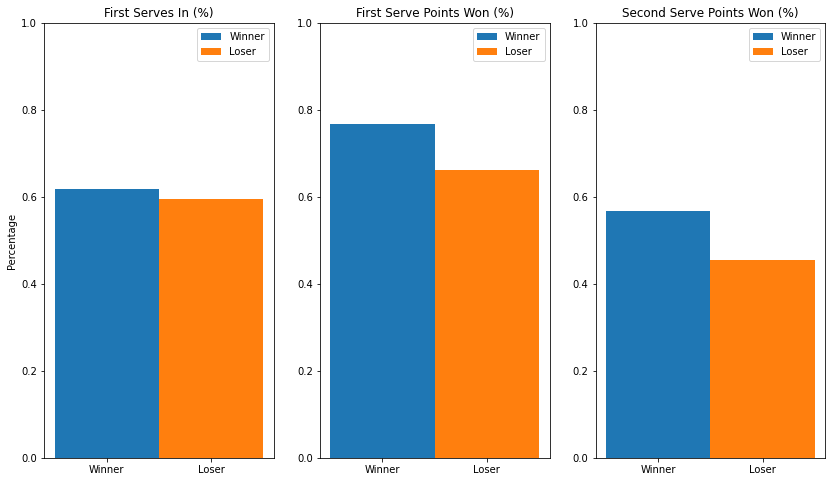

In [9]:
# instantiate plot
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (14,8))
width = 0.35


# plot first serve percentages -- winner vs loser
plot_winner_loser(ax1, [avg_first_serve_in_win, avg_first_serve_in_lose])
ax1.set_ylabel('Percentage')
ax1.set_title('First Serves In (%)')
ax1.set_xticks([0, width])
ax1.set_xticklabels(['Winner', 'Loser'])
ax1.legend()

# plot first serve point percentages -- winner vs loser
plot_winner_loser(ax2, [avg_first_serve_points_win, avg_first_serve_points_lose])
#ax2.set_ylabel('Percentage')
ax2.set_title('First Serve Points Won (%)')
ax2.set_xticks([0, width])
ax2.set_xticklabels(['Winner', 'Loser'])
ax2.legend()

# plot second serve point percentages -- winner vs loser
plot_winner_loser(ax3, [avg_second_serve_points_win, avg_second_serve_points_lose])
ax3.set_title('Second Serve Points Won (%)')
#ax3.set_ylabel('Percentage')
ax3.set_xticks([0, width])
ax3.set_xticklabels(['Winner', 'Loser'])
ax3.legend();


# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

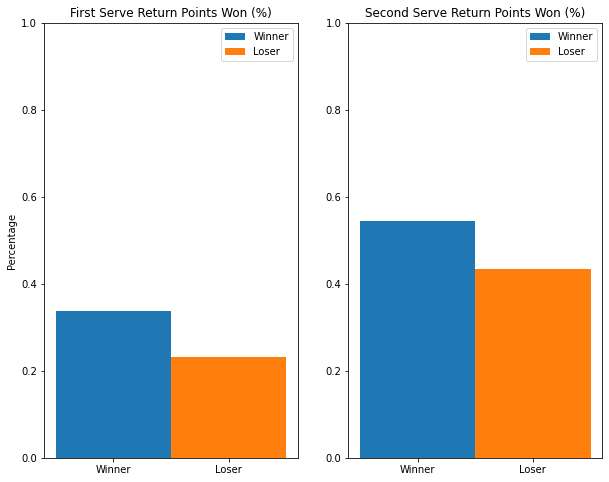

In [10]:
# instantiate plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
width = 0.35


# plot first serve point percentages -- winner vs loser
plot_winner_loser(ax1, [avg_first_return_points_win, avg_first_return_points_lose])
ax1.set_title('First Serve Return Points Won (%)')
ax1.set_ylabel('Percentage')
ax1.set_xticks([0, width])
ax1.set_xticklabels(['Winner', 'Loser'])
ax1.legend()

# plot second serve point percentages -- winner vs loser
plot_winner_loser(ax2, [avg_second_return_points_win, avg_second_return_points_lose])
ax2.set_title('Second Serve Return Points Won (%)')
ax2.set_xticks([0, width])
ax2.set_xticklabels(['Winner', 'Loser'])
ax2.legend();

---

### Merging data

**Only look at players with a certain amount of matches**

In [114]:
df_score.loc[df_scores.loser_name=='Adrian Andreev']

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id
549,2017-7434,9,sofia,/en/scores/archive/sofia/7434/2017/results,1st Round Qualifying,7,3,Maximilian Marterer,mn13,maximilian-marterer,...,3,WC,62 60,2,0,12,2,0,0,2017-7434-mn13-a0ab


In [147]:
# create a feature that counts amount of times a player has won
win_counts = df_scores.groupby('winner_name').count()['tourney_year_id']

# create a feature that counts amount of times a player has lost
lose_counts = df_scores.groupby('loser_name').count()['tourney_year_id']

# add together for total matches


In [163]:
winners = []
for name in df_scores.winner_name:
    winners.append(name)
winners = set(winners)

losers = []
for name in df_scores.loser_name:
    losers.append(name)
losers = set(losers)

perf = []
for name in winners:
    if name not in losers:
        perf.append(name)
print(losers)

{'Anil Yuksel', 'Benjamin Becker', 'Ryan Goetz', 'Saketh Myneni', 'William Blumberg', 'Maxime Janvier', 'Yosuke Watanuki', 'Rajeev Ram', 'Rocco Savin', 'Hiroki Moriya', 'Scott Jones', 'Andres Molteni', 'Daniel Masur', 'Kevin King', 'Matthew Ebden', 'Rudolf Molleker', 'Pablo                Carreno Busta', 'Kamil Majchrzak', 'Taha Tifnouti', 'Jason Jung', 'Martin Klizan', 'Reilly Opelka', 'Quentin Halys', 'Julien Benneteau', 'Benoit Paire', 'Nils Langer', 'Yannick Hanfmann', 'Marsel Ilhan', 'Richard Gasquet', 'Marin                Cilic', 'Roberto Quiroz', 'Taylor Fritz', 'Adrian Menendez-Maceiras', 'Yuichi Sugita', 'Scott Lipsky', 'Ruben Ramirez Hidalgo', 'James Ward', 'Tennys Sandgren', 'Jurgen Melzer', 'Neil Pauffley', 'Caio Zampieri', 'Cameron Norrie', 'Yuya Kibi', 'Ivan Gakhov', 'Ti Chen', 'Lenny Hampel', 'Federico Gaio', 'Artem Sitak', 'Marc-Andrea Huesler', 'Florian Mayer', 'Michal Konecny', 'Antoine Leduc', 'Michael Venus', 'Sho Shimabukuro', 'Daniil Medvedev', 'Louis Wessels', '

In [148]:
df_scores.groupby('winner_name').count() + df_scores.groupby('loser_name').count()

,loser_games_won,loser_name,loser_player_id,loser_seed,loser_sets_won,loser_slug,loser_tiebreaks_won,match_id,match_order,match_score_tiebreaks,...,tourney_slug,tourney_url_suffix,tourney_year_id,winner_games_won,winner_name,winner_player_id,winner_seed,winner_sets_won,winner_slug,winner_tiebreaks_won
Adam Pavlasek,7.0,NaN,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
Adrian Andreev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrian Bodmer,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
Adrian Mannarino,66.0,NaN,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,...,66.0,66.0,66.0,66.0,NaN,66.0,66.0,66.0,66.0,66.0
Adrian Menendez-Maceiras,18.0,NaN,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,NaN,18.0,18.0,18.0,18.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ze Zhang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhizhen Zhang,7.0,NaN,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
Zihao Xia,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
Zizou Bergs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Scores and Stats

In [11]:
df = pd.merge(df_scores, df_stats, on = 'match_id')

In [12]:
df.groupby('winner_name')['winner_first_serve_points_won', 'winner_first_serve_points_total'].mean()

/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,winner_first_serve_points_won,winner_first_serve_points_total
winner_name,,
Adam Pavlasek,59.000000,70.000000
Adrian Bodmer,37.000000,42.000000
Adrian Mannarino,34.794872,48.897436
Adrian Menendez-Maceiras,33.000000,44.125000
Agustin Velotti,22.500000,31.500000
...,...,...
Yusuke Takahashi,22.000000,30.000000
Yuya Kibi,42.000000,60.000000
Zdenek Kolar,42.000000,58.000000


In [13]:
df.shape

(3798, 75)

#### First Serves

In [14]:
# percentage of first serves made
df["winner_first_serve_pct"] = df["winner_first_serves_in"] / df["winner_first_serves_total"]

# percentage of first serve points won
df["winner_first_serve_win_pct"] = df["winner_first_serve_points_won"] / df["winner_first_serves_in"]

# percentage of service points won
df["winner_service_win_pct"] = df["winner_service_points_won"] / df["winner_service_points_total"]

# percentage of first serves made
df["loser_first_serve_pct"] = df["loser_first_serves_in"] / df["loser_first_serves_total"]

# percentage of first serve points won
df["loser_first_serve_win_pct"] = df["loser_first_serve_points_won"] / df["loser_first_serves_in"]

# percentage of service points won
df["loser_service_win_pct"] = df["loser_service_points_won"] / df["loser_service_points_total"]

**Second Serves & Returns**

In [15]:
# second serve points won (pecentage)
df["winner_second_serve_win_pct"] = (df['winner_second_serve_points_won'] / df['winner_second_serve_points_total'])

df["loser_second_serve_win_pct"] = (df['loser_second_serve_points_won'] / df['loser_second_serve_points_total'])

# first serve return points won (percentage)
df["winner_first_return_win_pct"] = (df['winner_first_serve_return_won'] / df['winner_first_serve_return_total'])

df["loser_first_return_win_pct"] = (df['loser_first_serve_return_won'] / df['loser_first_serve_return_total'])

# second serve return points won (percentage)
df["winner_second_return_win_pct"] = (df['winner_second_serve_return_won'] / df['winner_second_serve_return_total'])

df["loser_second_return_win_pct"] = (df['loser_second_serve_return_won'] / df['loser_second_serve_return_total'])

In [16]:
df.shape

(3798, 87)

In [17]:
winner_serve_stats = df.groupby("winner_name")[
    ["winner_first_serve_pct", "winner_first_serve_win_pct", "winner_service_win_pct",
     "winner_second_serve_win_pct", "winner_first_return_win_pct", "winner_second_return_win_pct"]
].mean()

names = df.loc[:, ['winner_name', 'winner_player_id']].drop_duplicates()
names = names.set_index('winner_name')

winner_serve_stats = pd.merge(names, winner_serve_stats, on=names.index)

winner_serve_stats = winner_serve_stats.rename(columns={'key_0': 'player'}).set_index('player')

winner_serve_stats.head()

,winner_player_id,winner_first_serve_pct,winner_first_serve_win_pct,winner_service_win_pct,winner_second_serve_win_pct,winner_first_return_win_pct,winner_second_return_win_pct
player,,,,,,,
Grigor Dimitrov,d875,0.679612,0.842857,0.737864,0.515152,0.438356,0.425926
Kei Nishikori,n552,0.583333,0.880952,0.708333,0.466667,0.311111,0.517241
Milos Raonic,r975,0.608746,0.720023,0.656980,0.562979,0.358415,0.540065
Stan Wawrinka,w367,0.628700,0.762690,0.685830,0.562749,0.375617,0.603243
Dominic Thiem,tb69,0.508277,0.738043,0.672278,0.602207,0.403061,0.561924


In [18]:
loser_serve_stats = df.groupby("loser_name")[
    ["loser_first_serve_pct", "loser_first_serve_win_pct", "loser_service_win_pct",
     "loser_second_serve_win_pct", "loser_first_return_win_pct", "loser_second_return_win_pct"]
].mean()

names = df.loc[:, ['loser_name', 'loser_player_id']].drop_duplicates()
names = names.set_index('loser_name')

loser_serve_stats = pd.merge(names, loser_serve_stats, on=names.index)
loser_serve_stats = loser_serve_stats.rename(columns={'key_0': 'player'}).set_index('player')

loser_serve_stats.head()

,loser_player_id,loser_first_serve_pct,loser_first_serve_win_pct,loser_service_win_pct,loser_second_serve_win_pct,loser_first_return_win_pct,loser_second_return_win_pct
player,,,,,,,
Kei Nishikori,n552,0.551215,0.617677,0.523044,0.400452,0.242226,0.439258
Milos Raonic,r975,0.472222,0.470588,0.333333,0.210526,0.153846,0.416667
Stan Wawrinka,w367,0.474005,0.792857,0.630371,0.492761,0.206330,0.340839
Rafael Nadal,n409,0.593675,0.622443,0.557169,0.465395,0.240063,0.472371
Kyle Edmund,e831,0.634960,0.603326,0.556396,0.456368,0.200424,0.496788


In [19]:
print(winner_serve_stats.mean())
print()
loser_serve_stats.mean()

winner_first_serve_pct          0.615900
winner_first_serve_win_pct      0.755608
winner_service_win_pct          0.681651
winner_second_serve_win_pct     0.564707
winner_first_return_win_pct     0.347485
winner_second_return_win_pct    0.544874
dtype: float64



loser_first_serve_pct          0.594103
loser_first_serve_win_pct      0.639190
loser_service_win_pct          0.555914
loser_second_serve_win_pct     0.439670
loser_first_return_win_pct     0.230975
loser_second_return_win_pct    0.426635
dtype: float64

**Average winner service stats**
>- first serve percentage:        0.615900
- first serve win percentage:    0.755608
- service win percentage        0.681651
- second serve win percentage:  0.564707
- first serve return win percentage: 0.347485
- second serve return win percentage: 0.544874


**Average loser service stats**
>- first serve percentage:        0.594103
- first serve win percentage:    0.639190
- service win percentage        0.555914
- second serve win percentage:  0.439670
- first serve return win percentage: 0.230975
- second serve return win percentage: 0.426635

In [20]:
# combine winner and loser dataframes
p_stats = pd.concat([winner_serve_stats.copy(), loser_serve_stats.copy()], axis=1)
p_stats = p_stats.fillna(0)
p_stats["first_serve_pct"] = (p_stats["winner_first_serve_pct"] + p_stats["loser_first_serve_pct"]) / 2
p_stats["first_serve_win_pct"] = (p_stats["winner_first_serve_win_pct"] + p_stats["loser_first_serve_win_pct"]) / 2
p_stats["service_win_pct"] = (p_stats["winner_service_win_pct"] + p_stats["loser_service_win_pct"]) / 2
p_stats["second_serve_win_pct"] = (p_stats["winner_second_serve_win_pct"] + p_stats["loser_second_serve_win_pct"]) / 2
p_stats["first_return_win_pct"] = (p_stats["winner_first_return_win_pct"] + p_stats["loser_first_return_win_pct"]) / 2
p_stats["second_return_win_pct"] = (p_stats["winner_second_return_win_pct"] + p_stats["loser_second_return_win_pct"]) / 2

p_stats.head()

,winner_player_id,winner_first_serve_pct,winner_first_serve_win_pct,winner_service_win_pct,winner_second_serve_win_pct,winner_first_return_win_pct,winner_second_return_win_pct,loser_player_id,loser_first_serve_pct,loser_first_serve_win_pct,loser_service_win_pct,loser_second_serve_win_pct,loser_first_return_win_pct,loser_second_return_win_pct,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
Grigor Dimitrov,d875,0.679612,0.842857,0.737864,0.515152,0.438356,0.425926,d875,0.598214,0.701493,0.580357,0.400000,0.288462,0.434783,0.638913,0.772175,0.659111,0.457576,0.363409,0.430354
Kei Nishikori,n552,0.583333,0.880952,0.708333,0.466667,0.311111,0.517241,n552,0.551215,0.617677,0.523044,0.400452,0.242226,0.439258,0.567274,0.749315,0.615689,0.433560,0.276669,0.478249
Milos Raonic,r975,0.608746,0.720023,0.656980,0.562979,0.358415,0.540065,r975,0.472222,0.470588,0.333333,0.210526,0.153846,0.416667,0.540484,0.595305,0.495156,0.386752,0.256131,0.478366
Stan Wawrinka,w367,0.628700,0.762690,0.685830,0.562749,0.375617,0.603243,w367,0.474005,0.792857,0.630371,0.492761,0.206330,0.340839,0.551353,0.777774,0.658101,0.527755,0.290974,0.472041
Dominic Thiem,tb69,0.508277,0.738043,0.672278,0.602207,0.403061,0.561924,tb69,0.619439,0.720325,0.604990,0.418822,0.200081,0.369152,0.563858,0.729184,0.638634,0.510514,0.301571,0.465538


In [21]:
p_stats.drop(columns='loser_player_id', inplace=True)
p_stats.rename(columns={'winner_player_id': 'player_id'}, inplace=True)

p_stats = p_stats[["player_id", "first_serve_pct", "first_serve_win_pct", "service_win_pct",
                   "second_serve_win_pct", "first_return_win_pct", "second_return_win_pct"]]

In [22]:
# find the amount of players who have only lost
losers = []
for name in df["loser_name"].unique():
    if name not in df["winner_name"].unique():
        losers.append(name)
        
len(losers)

195

In [23]:
# average loser_stats
p_stats.loc[losers].describe()

,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.295986,0.322893,0.280985,0.222279,0.113622,0.213859
std,0.033530,0.034849,0.027773,0.036970,0.028905,0.042842
min,0.170000,0.200000,0.190476,0.076923,0.000000,0.000000
25%,0.277840,0.304562,0.268935,0.207795,0.097168,0.198372
50%,0.298928,0.324864,0.285013,0.228125,0.115598,0.218750
75%,0.317809,0.346533,0.300118,0.243976,0.130176,0.236077
max,0.419643,0.404762,0.351973,0.303571,0.223881,0.312500


In [24]:
p_stats.drop(losers).describe()

,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.604733,0.694508,0.616175,0.500097,0.289975,0.484797
std,0.046168,0.055439,0.043316,0.055586,0.046564,0.052941
min,0.294527,0.388348,0.348121,0.291515,0.146749,0.250000
25%,0.578145,0.668019,0.595775,0.471699,0.265586,0.455477
50%,0.604012,0.698625,0.619553,0.503872,0.287490,0.486117
75%,0.628850,0.729184,0.643202,0.524127,0.312485,0.513629
max,0.801707,0.825109,0.766336,0.792429,0.640097,0.629091


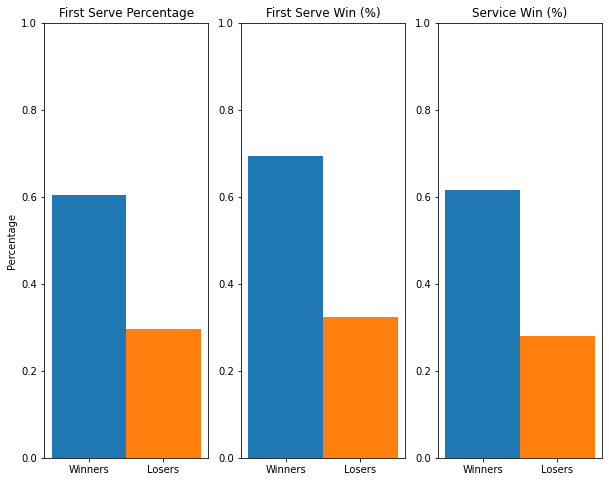

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (10,8))
width = 0.35


plot_winner_loser(ax1,
                  [p_stats.drop(losers)["first_serve_pct"].mean(),
                   p_stats.loc[losers, "first_serve_pct"].mean()])

ax1.set_title("First Serve Percentage")
ax1.set_ylabel("Percentage")
ax1.set_xticks([0, width])
ax1.set_xticklabels(["Winners", "Losers"])

plot_winner_loser(ax2,
                  [p_stats.drop(losers)["first_serve_win_pct"].mean(),
                   p_stats.loc[losers, "first_serve_win_pct"].mean()])

ax2.set_title("First Serve Win (%)")
ax2.set_xticks([0, width])
ax2.set_xticklabels(["Winners", "Losers"])

plot_winner_loser(ax3,
                  [p_stats.drop(losers)["service_win_pct"].mean(),
                   p_stats.loc[losers, "service_win_pct"].mean()])

ax3.set_title("Service Win (%)")
ax3.set_xticks([0, width])
ax3.set_xticklabels(["Winners", "Losers"]);

In [26]:
p_stats["service_win_pct"].rank(ascending=False).astype(int)

Grigor Dimitrov           33
Kei Nishikori            182
Milos Raonic             326
Stan Wawrinka             36
Dominic Thiem            100
                        ... 
Denis Matsukevich        467
Artem Dubrivnyy          349
Karl Friberg             416
Viktor Galovic           344
Felix Auger-Aliassime    508
Name: service_win_pct, Length: 528, dtype: int64

In [27]:
p_stats.sort_values("service_win_pct", ascending=False).head(10)

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
Marko Tepavac,tc11,0.582688,0.786476,0.766336,0.713169,0.352997,0.501197
Nicolas Mahut,m873,0.801707,0.771930,0.759036,0.730769,0.640097,0.250000
Lukas Rosol,r685,0.575782,0.825109,0.755435,0.650219,0.339098,0.475886
Prajnesh Gunneswaran,ga94,0.652301,0.772988,0.703778,0.583189,0.282757,0.466289
Daniel Brands,bc72,0.686522,0.754136,0.699684,0.579532,0.232761,0.542638
Nikola Mektic,mf09,0.611963,0.750965,0.691033,0.619828,0.230270,0.446726
Roberto Carballes Baena,cf59,0.627221,0.786255,0.686139,0.522043,0.239100,0.468195
Bradley Klahn,ka98,0.640961,0.759451,0.683974,0.547230,0.272294,0.460446
Bjorn Fratangelo,f811,0.614551,0.735709,0.683538,0.596221,0.207547,0.476981
Pedja Krstin,kd70,0.675139,0.743024,0.680518,0.564556,0.260324,0.425402


In [28]:
p_stats.sort_values("first_serve_win_pct", ascending=False).head(10)

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
Lukas Rosol,r685,0.575782,0.825109,0.755435,0.650219,0.339098,0.475886
Steven Diez,d916,0.547936,0.818065,0.675018,0.503819,0.285484,0.475925
Alexander Sarkissian,sl07,0.546852,0.799060,0.663789,0.501023,0.302499,0.574700
Grega Zemlja,z189,0.505902,0.793972,0.644614,0.506437,0.333717,0.389563
Brian Baker,ba23,0.593762,0.792555,0.667885,0.509586,0.275300,0.458556
Marko Tepavac,tc11,0.582688,0.786476,0.766336,0.713169,0.352997,0.501197
Roberto Carballes Baena,cf59,0.627221,0.786255,0.686139,0.522043,0.239100,0.468195
Joao Pedro Sorgi,sk69,0.663199,0.785512,0.667727,0.462366,0.288501,0.481372
Daniil Medvedev,mm58,0.537462,0.784017,0.666104,0.532279,0.271795,0.414883
Mathias Bourgue,bk19,0.583916,0.782909,0.669307,0.516433,0.260627,0.503408


In [29]:
p_stats.sort_values("first_serve_pct", ascending=False).head(10)

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
Nicolas Mahut,m873,0.801707,0.771930,0.759036,0.730769,0.640097,0.250000
Yannick Maden,mh16,0.749806,0.441959,0.448042,0.792429,0.171241,0.274632
Dennis Novak,db59,0.737892,0.640412,0.640313,0.683636,0.199280,0.552326
Paul-Henri Mathieu,m850,0.737313,0.648563,0.570832,0.348847,0.343953,0.431980
Konstantin Kravchuk,k776,0.706731,0.635772,0.585737,0.386364,0.204167,0.381579
Lorenzo Giustino,ga79,0.703534,0.715851,0.654923,0.515791,0.228953,0.500638
Thomas Fabbiano,f586,0.697625,0.564428,0.534174,0.457135,0.171889,0.440160
Guido Andreozzi,a887,0.697202,0.684456,0.642104,0.547162,0.272066,0.483824
Liam Broady,bi23,0.695048,0.690395,0.638056,0.531828,0.321102,0.479498
Tatsuma Ito,i230,0.692716,0.727810,0.667527,0.527740,0.262313,0.505506


In [30]:
p_stats.head()

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct
Grigor Dimitrov,d875,0.638913,0.772175,0.659111,0.457576,0.363409,0.430354
Kei Nishikori,n552,0.567274,0.749315,0.615689,0.433560,0.276669,0.478249
Milos Raonic,r975,0.540484,0.595305,0.495156,0.386752,0.256131,0.478366
Stan Wawrinka,w367,0.551353,0.777774,0.658101,0.527755,0.290974,0.472041
Dominic Thiem,tb69,0.563858,0.729184,0.638634,0.510514,0.301571,0.465538


In [31]:
df_rankings

,Unnamed: 0,rank,age,player,player_id,rank_change
0,0,1,31.0,rafael-nadal,n409,5
1,1,2,36.0,roger-federer,f324,8
2,2,3,26.0,grigor-dimitrov,d875,10
3,3,4,20.0,alexander-zverev,z355,18
4,4,5,24.0,dominic-thiem,tb69,3
...,...,...,...,...,...,...
1995,1995,1994,22.0,keisuke-numajiri,n717,-791
1996,1996,1997,20.0,andrej-glvac,g09d,0
1997,1997,1997,26.0,victor-nunez,n583,-721
1998,1998,1999,20.0,isa-mammetgulyyev,mv58,-779


In [32]:
df = pd.merge(p_stats, df_rankings, on='player_id')
df.drop(columns='Unnamed: 0', inplace=True)

df = df.sort_values('rank')

def name(player):
    player = player.split('-')
    return player[0].capitalize() + ' ' + player[1].capitalize()

df['player'] = df['player'].apply(name)

df.set_index('player', inplace=True)

df['cluster_rank'] = df['rank'].sort_values(ascending=False).values

df.head()

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank
player,,,,,,,,,,,
Rafael Nadal,n409,0.574210,0.704473,0.624520,0.514609,0.344929,0.542005,1,31.0,5,1124
Roger Federer,f324,0.665323,0.680556,0.610887,0.503205,0.328591,0.629091,2,36.0,8,1044
Grigor Dimitrov,d875,0.638913,0.772175,0.659111,0.457576,0.363409,0.430354,3,26.0,10,941
Alexander Zverev,z355,0.552293,0.756638,0.649309,0.517375,0.231466,0.479966,4,20.0,18,841
Dominic Thiem,tb69,0.563858,0.729184,0.638634,0.510514,0.301571,0.465538,5,24.0,3,808


In [33]:
df.iloc[0:20, 1:7].mean().to_frame()

,0
first_serve_pct,0.600132
first_serve_win_pct,0.694797
service_win_pct,0.617019
second_serve_win_pct,0.504712
first_return_win_pct,0.302204
second_return_win_pct,0.505235


In [34]:
df.iloc[50:, 1:7].mean().to_frame()

,0
first_serve_pct,0.605438
first_serve_win_pct,0.694604
service_win_pct,0.616813
second_serve_win_pct,0.501547
first_return_win_pct,0.289340
second_return_win_pct,0.483852


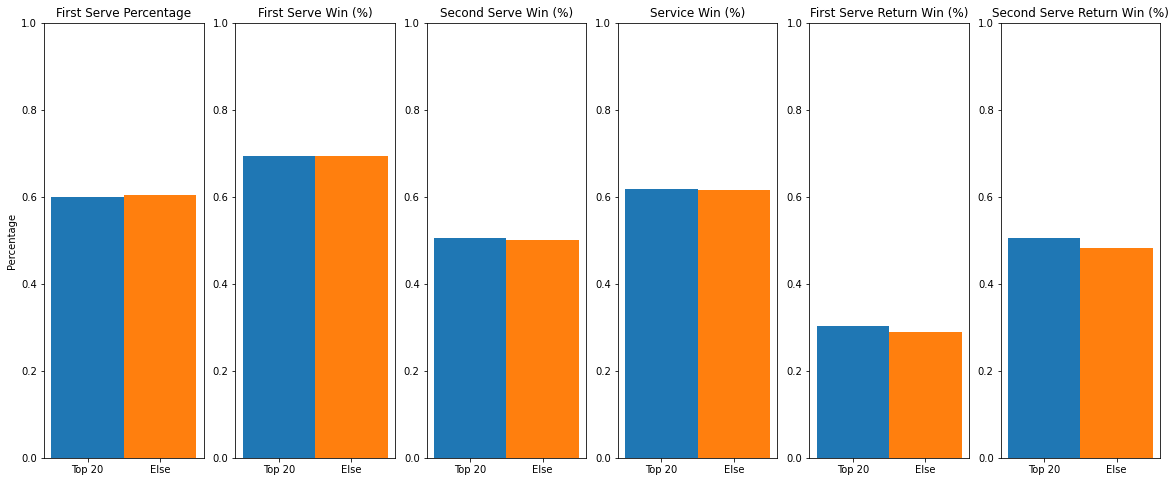

In [35]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols = 6, figsize = (20,8))
width = 0.35


plot_winner_loser(ax1,
                  [df.iloc[0:20, 1].mean(),
                   df.iloc[20:, 1].mean()])

ax1.set_title("First Serve Percentage")
ax1.set_ylabel("Percentage")
ax1.set_xticks([0, width])
ax1.set_xticklabels(["Top 20", "Else"])

plot_winner_loser(ax2,
                  [df.iloc[0:20, 2].mean(),
                   df.iloc[20:, 2].mean()])

ax2.set_title("First Serve Win (%)")
ax2.set_xticks([0, width])
ax2.set_xticklabels(["Top 20", "Else"])


plot_winner_loser(ax3,
                  [df.iloc[0:20, 4].mean(),
                   df.iloc[20:, 4].mean()])

ax3.set_title("Second Serve Win (%)")
ax3.set_xticks([0, width])
ax3.set_xticklabels(["Top 20", "Else"])


plot_winner_loser(ax4,
                  [df.iloc[0:20, 3].mean(),
                   df.iloc[20:, 3].mean()])

ax4.set_title("Service Win (%)")
ax4.set_xticks([0, width])
ax4.set_xticklabels(["Top 20", "Else"]);


plot_winner_loser(ax5,
                  [df.iloc[0:20, 5].mean(),
                   df.iloc[20:, 5].mean()])

ax5.set_title("First Serve Return Win (%)")
ax5.set_xticks([0, width])
ax5.set_xticklabels(["Top 20", "Else"])

plot_winner_loser(ax6,
                  [df.iloc[0:20, 6].mean(),
                   df.iloc[20:, 6].mean()])

ax6.set_title("Second Serve Return Win (%)")
ax6.set_xticks([0, width])
ax6.set_xticklabels(["Top 20", "Else"]);

In [36]:
df.describe()

,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.604760,0.694516,0.616237,0.500216,0.289817,0.484489,214.280120,26.807229,7.590361,214.280120
std,0.046235,0.055522,0.043367,0.055628,0.046545,0.052721,184.715793,4.728158,172.233912,184.715793
min,0.294527,0.388348,0.348121,0.291515,0.146749,0.250000,1.000000,17.000000,-871.000000,1.000000
25%,0.578075,0.668003,0.595622,0.472290,0.265278,0.455198,83.750000,23.000000,-56.250000,83.750000
50%,0.604338,0.698654,0.619804,0.503960,0.287367,0.485764,171.500000,27.000000,0.500000,171.500000
75%,0.629090,0.729426,0.643203,0.524129,0.312412,0.513442,287.750000,30.000000,57.250000,287.750000
max,0.801707,0.825109,0.766336,0.792429,0.640097,0.629091,1124.000000,39.000000,780.000000,1124.000000


In [37]:
df['cluster_rank'] = df['rank'].sort_values(ascending=False).values

---

## Clustering

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
df.head()

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank
player,,,,,,,,,,,
Rafael Nadal,n409,0.574210,0.704473,0.624520,0.514609,0.344929,0.542005,1,31.0,5,1124
Roger Federer,f324,0.665323,0.680556,0.610887,0.503205,0.328591,0.629091,2,36.0,8,1044
Grigor Dimitrov,d875,0.638913,0.772175,0.659111,0.457576,0.363409,0.430354,3,26.0,10,941
Alexander Zverev,z355,0.552293,0.756638,0.649309,0.517375,0.231466,0.479966,4,20.0,18,841
Dominic Thiem,tb69,0.563858,0.729184,0.638634,0.510514,0.301571,0.465538,5,24.0,3,808


In [40]:
df.describe()

,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.604760,0.694516,0.616237,0.500216,0.289817,0.484489,214.280120,26.807229,7.590361,214.280120
std,0.046235,0.055522,0.043367,0.055628,0.046545,0.052721,184.715793,4.728158,172.233912,184.715793
min,0.294527,0.388348,0.348121,0.291515,0.146749,0.250000,1.000000,17.000000,-871.000000,1.000000
25%,0.578075,0.668003,0.595622,0.472290,0.265278,0.455198,83.750000,23.000000,-56.250000,83.750000
50%,0.604338,0.698654,0.619804,0.503960,0.287367,0.485764,171.500000,27.000000,0.500000,171.500000
75%,0.629090,0.729426,0.643203,0.524129,0.312412,0.513442,287.750000,30.000000,57.250000,287.750000
max,0.801707,0.825109,0.766336,0.792429,0.640097,0.629091,1124.000000,39.000000,780.000000,1124.000000


In [41]:
df['cluster_age'] = 1 / df['age']

In [42]:
features = ['first_serve_pct', 'first_serve_win_pct', 'service_win_pct', 'rank_change',
            'cluster_rank', 'cluster_age', 'second_serve_win_pct', 'first_return_win_pct', 'second_return_win_pct']

X = df[features]

# scale data
ss = StandardScaler()
Z = ss.fit_transform(X)

# fit KMeans model
km = KMeans(n_clusters=4, random_state=527)
km.fit(X)

# assign cluster labels 
df['clusters'] = km.labels_

In [43]:
# means for each cluster
features.append('rank')
df.groupby('clusters')[features].mean()

,first_serve_pct,first_serve_win_pct,service_win_pct,rank_change,cluster_rank,cluster_age,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank
clusters,,,,,,,,,,
0,0.598426,0.687624,0.609992,440.000000,122.045455,0.042916,0.492817,0.287253,0.480754,265.136364
1,0.607260,0.692529,0.615756,37.710227,218.494318,0.039465,0.502347,0.289213,0.478415,150.602273
2,0.596498,0.691782,0.611068,11.473684,617.789474,0.035038,0.493530,0.297051,0.493110,19.500000
3,0.604899,0.700820,0.620594,-148.260417,67.968750,0.037127,0.500652,0.288649,0.493068,396.468750


/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Text(0.5, 1.0, 'Silhouette Score over k')

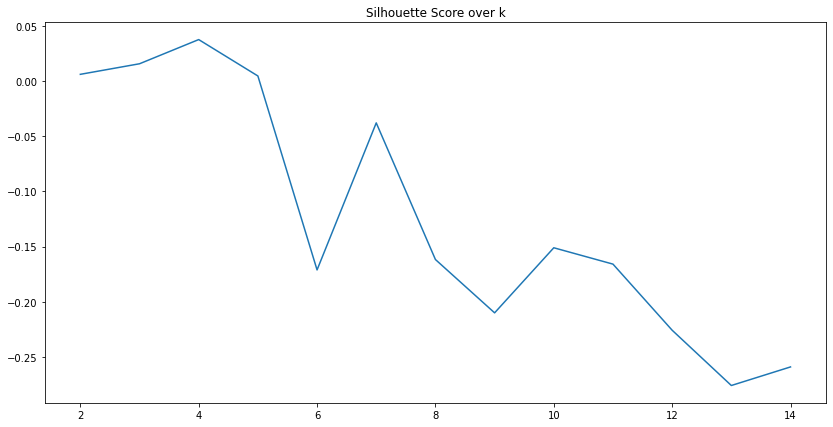

In [44]:
from sklearn.preprocessing import PolynomialFeatures

scores = []
df_copy = df.copy()
df_copy.drop(columns='clusters', inplace=True)

features.pop()
X = df_copy[features]

ss = StandardScaler()
Z = ss.fit_transform(X)

for k in range(2, 15):
    km = KMeans(n_clusters=k, random_state=527)
    km.fit(Z)
    X['clusters'] = km.labels_
    sil = silhouette_score(X.drop(columns='clusters'), X.clusters)
    scores.append([k, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'silhouette']


fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(score_df.k, score_df.silhouette);
ax.set_title('Silhouette Score over k')

In [45]:
score_df.sort_values('silhouette', ascending=False)

,k,silhouette
2,4,0.037645
1,3,0.015712
0,2,0.006129
3,5,0.004643
5,7,-0.037905
8,10,-0.151151
6,8,-0.161799
9,11,-0.165973
4,6,-0.171235
7,9,-0.210163


- **Silhouette Score of 0.56 for k = 10**

In [46]:
features = ['first_serve_pct', 'first_serve_win_pct', 'service_win_pct', 'rank_change',
            'cluster_rank', 'cluster_age', 'second_serve_win_pct', 'first_return_win_pct', 'second_return_win_pct']

X = df[features]
poly = PolynomialFeatures(interaction_only=True)
X_poly = poly.fit_transform(X)

ss = StandardScaler()
Z = ss.fit_transform(X_poly)

# # scale data
# ss = StandardScaler()
# Z = ss.fit_transform(X)

# fit KMeans model
km = KMeans(n_clusters=5, random_state=527)
km.fit(Z)

# assign cluster labels 
df['clusters'] = km.labels_

In [47]:
df.groupby('clusters').count()

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank,cluster_age
clusters,,,,,,,,,,,,
0,87,87,87,87,87,87,87,87,87,87,87,87
1,82,82,82,82,82,82,82,82,82,82,82,82
2,19,19,19,19,19,19,19,19,19,19,19,19
3,103,103,103,103,103,103,103,103,103,103,103,103
4,41,41,41,41,41,41,41,41,41,41,41,41


In [48]:
df.groupby('clusters').mean().sort_values('rank')

,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank,cluster_age
clusters,,,,,,,,,,,
4,0.595820,0.702138,0.619146,0.498765,0.298881,0.495860,22.951220,29.146341,14.780488,590.341463,0.034897
1,0.603595,0.653065,0.576403,0.462619,0.268948,0.455320,197.402439,28.670732,-10.914634,200.475610,0.035657
3,0.604351,0.704991,0.628532,0.514589,0.290336,0.488567,207.844660,22.466019,49.427184,175.572816,0.045069
2,0.611134,0.705538,0.625362,0.504848,0.286176,0.486594,240.105263,25.473684,462.421053,137.000000,0.041355
0,0.609164,0.715184,0.635861,0.518308,0.305396,0.501334,322.333333,29.379310,-127.218391,112.770115,0.034518


In [59]:
df.loc['Denis Shapovalov']

player_id                     su55
first_serve_pct           0.614139
first_serve_win_pct       0.758696
service_win_pct           0.633007
second_serve_win_pct      0.435714
first_return_win_pct      0.273214
second_return_win_pct     0.502558
rank                            51
age                             18
rank_change                    183
cluster_rank                   350
cluster_age              0.0555556
clusters                         3
Name: Denis Shapovalov, dtype: object

In [55]:
target_ages = (df.age >= 17) & (df.age <= 23)
target_clusters = (df.clusters == 1)

df.loc[target_ages & target_clusters]

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank,cluster_age,clusters
player,,,,,,,,,,,,,
Kyle Edmund,e831,0.599760,0.629441,0.566202,0.465537,0.244151,0.534108,50,22.0,-3,358,0.045455,1
Jared Donaldson,dc58,0.578145,0.472132,0.474859,0.457817,0.272751,0.511667,54,21.0,46,345,0.047619,1
Maximilian Marterer,mn13,0.601940,0.599990,0.540488,0.471145,0.230478,0.547458,92,22.0,76,271,0.045455,1
Mitchell Krueger,kc12,0.608875,0.677873,0.611555,0.520444,0.238345,0.423204,188,23.0,26,154,0.043478,1
Dmitry Popko,pg20,0.613472,0.651567,0.591350,0.497176,0.255992,0.403034,196,21.0,23,148,0.047619,1
Bradley Mousley,mn44,0.581106,0.605077,0.491367,0.336740,0.185297,0.432961,313,21.0,177,71,0.047619,1
Botic Van%20de%20zandschulp,v812,0.538012,0.696889,0.594388,0.474996,0.259455,0.443436,411,22.0,-16,39,0.045455,1
Rudolf Molleker,m0ac,0.294527,0.388348,0.348121,0.291515,0.169367,0.265451,600,17.0,439,17,0.058824,1


**Without using rank, rank_change, or age**
- **trying without those variables since it seems that they have bigger influence than I'd want**

In [70]:
from sklearn.preprocessing import PolynomialFeatures
features = ['first_serve_pct', 'first_serve_win_pct', 'service_win_pct', #'rank_change',
            #'cluster_rank', 'cluster_age',
            'second_serve_win_pct', 'first_return_win_pct', 'second_return_win_pct']


/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,k,silhouette
1,3,0.341406
12,14,0.332235
3,5,0.321811
5,7,0.316943
8,10,0.316186
9,11,0.316161
2,4,0.312255
10,12,0.308355
0,2,0.306978
11,13,0.304289


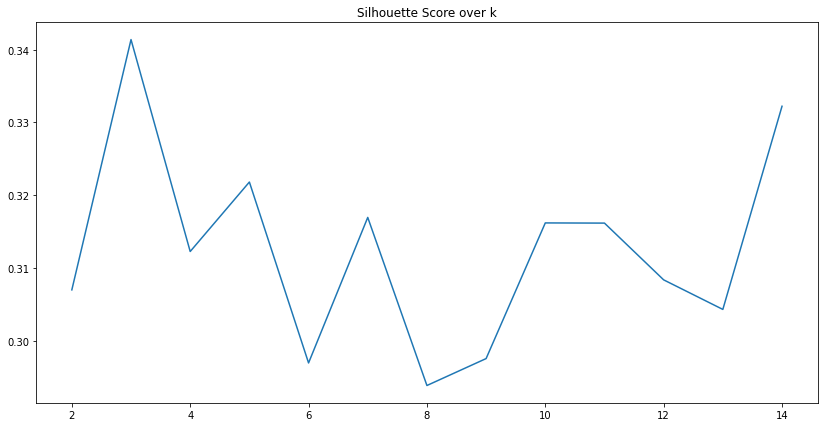

In [74]:

scores = []
df_copy = df.copy()
df_copy.drop(columns='clusters', inplace=True)

features.pop()
X = df_copy[features]

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

ss = StandardScaler()
Z = ss.fit_transform(X_poly)

for k in range(2, 15):
    km = KMeans(n_clusters=k, random_state=527)
    km.fit(Z)
    X['clusters'] = km.labels_
    sil = silhouette_score(X.drop(columns='clusters'), X.clusters)
    scores.append([k, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'silhouette']


fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(score_df.k, score_df.silhouette);
ax.set_title('Silhouette Score over k')

score_df.sort_values('silhouette', ascending=False)

In [75]:
features = ['first_serve_pct', 'first_serve_win_pct', 'service_win_pct', #'rank_change',
            #'cluster_rank', 'cluster_age',
           # 'second_serve_win_pct', 'first_return_win_pct', 'second_return_win_pct']
           ]

X = df[features]
poly = PolynomialFeatures(interaction_only=True)
X_poly = poly.fit_transform(X)

ss = StandardScaler()
Z = ss.fit_transform(X_poly)

# # scale data
# ss = StandardScaler()
# Z = ss.fit_transform(X)

# fit KMeans model
km = KMeans(n_clusters=5, random_state=527)
km.fit(Z)

# assign cluster labels 
df['clusters'] = km.labels_

df.groupby('clusters').mean().sort_values('rank')

,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank,cluster_age
clusters,,,,,,,,,,,
1,0.551213,0.558237,0.509776,0.465370,0.275016,0.462289,173.937500,27.500000,69.875000,252.062500,0.037752
4,0.586337,0.731651,0.637894,0.508333,0.286919,0.479555,206.203390,26.228814,-0.372881,228.025424,0.039525
2,0.584446,0.662737,0.586541,0.480928,0.292182,0.495623,208.772152,26.911392,0.594937,201.860759,0.038326
0,0.644434,0.670354,0.607816,0.498096,0.298696,0.492326,214.205128,27.000000,10.205128,217.371795,0.038006
3,0.642343,0.748019,0.668689,0.531654,0.282485,0.470989,264.024390,27.634146,14.707317,178.024390,0.037207


In [90]:
df.loc[df.clusters==3]

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank,cluster_age,clusters
player,,,,,,,,,,,,,
Grigor Dimitrov,d875,0.638913,0.772175,0.659111,0.457576,0.363409,0.430354,3,26.0,10,941,0.038462,3
Novak Djokovic,d643,0.651816,0.701288,0.661890,0.589978,0.210953,0.474270,12,30.0,-10,643,0.033333,3
Tomas Berdych,ba47,0.674174,0.704836,0.635489,0.495508,0.315078,0.519273,19,32.0,-7,592,0.031250,3
Peter Gojowczyk,g967,0.633339,0.764542,0.662424,0.483938,0.311350,0.422908,61,28.0,101,330,0.035714,3
Marton Fucsovics,f724,0.674128,0.710346,0.644875,0.518218,0.292266,0.479514,85,25.0,74,282,0.040000,3
Gilles Simon,sd32,0.672148,0.740386,0.636879,0.408125,0.241372,0.453780,91,32.0,-67,274,0.031250,3
Malek Jaziri,j267,0.610897,0.750406,0.655170,0.512151,0.278769,0.430051,97,33.0,-46,263,0.030303,3
Nicolas Mahut,m873,0.801707,0.771930,0.759036,0.730769,0.640097,0.250000,104,35.0,-62,250,0.028571,3
Roberto Carballes%20baena,cf59,0.627221,0.786255,0.686139,0.522043,0.239100,0.468195,107,24.0,38,245,0.041667,3


In [49]:
df.corr()['clusters'].to_frame()

,clusters
first_serve_pct,-0.065836
first_serve_win_pct,0.057124
service_win_pct,0.065849
second_serve_win_pct,0.049050
first_return_win_pct,-0.009169
second_return_win_pct,0.032470
rank,-0.384829
age,-0.380956
rank_change,0.365100
cluster_rank,0.520164


In [50]:
df.groupby('clusters')['rank'].mean().sort_values()

clusters
4     22.951220
1    197.402439
3    207.844660
2    240.105263
0    322.333333
Name: rank, dtype: float64

In [51]:
df[df['clusters'] == 0]

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,second_serve_win_pct,first_return_win_pct,second_return_win_pct,rank,age,rank_change,cluster_rank,cluster_age,clusters
player,,,,,,,,,,,,,
Donald Young,y124,0.599092,0.732662,0.662780,0.559152,0.282287,0.561310,62,28.0,12,329,0.035714,0
Federico Delbonis,d874,0.613674,0.664498,0.619553,0.541936,0.306926,0.549909,68,27.0,-19,318,0.037037,0
Florian Mayer,mb02,0.653503,0.650478,0.591628,0.474465,0.364558,0.534941,69,34.0,-19,317,0.029412,0
Guillermo Garcia,g476,0.585934,0.763163,0.650371,0.495946,0.290035,0.466349,70,34.0,24,315,0.029412,0
Mikhail Kukushkin,k926,0.578660,0.757965,0.665529,0.536784,0.282521,0.498540,74,29.0,25,307,0.034483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reda El%20amrani,e655,0.621308,0.731485,0.655921,0.524710,0.292899,0.454230,731,29.0,-49,8,0.034483,0
Giovanni Lapentti,l430,0.566772,0.676227,0.615577,0.531311,0.312485,0.482682,802,34.0,-162,7,0.029412,0
Nikola Mektic,mf09,0.611963,0.750965,0.691033,0.619828,0.230270,0.446726,803,28.0,-484,6,0.035714,0
